In [1]:
import numpy as np
import matplotlib.pyplot as plt

(1010,) (1010, 2)


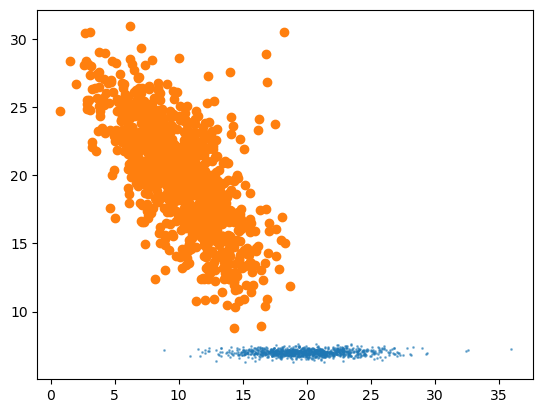

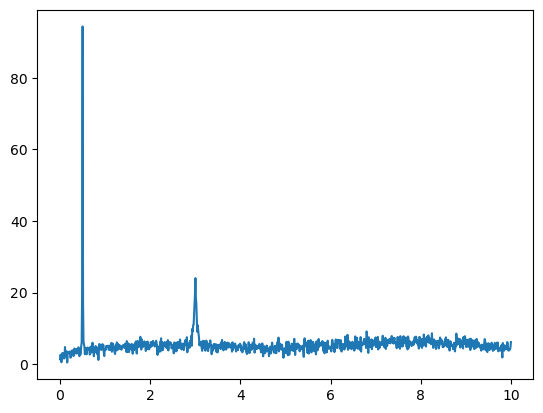

In [4]:
d1 = np.loadtxt('outlier_1d.txt')
d2 = np.loadtxt('outlier_2d.txt')
d3 = np.loadtxt('outlier_curve.txt')

print(d1.shape, d2.shape)
plt.scatter(d1,np.random.normal(7,0.2,size=d1.size),s=1,alpha=0.5)
plt.scatter(d2[:,0],d2[:,1])
plt.show();
plt.plot(d3[:,0],d3[:,1]);

The Common Outlier Pruning Method: 
1. Model your data as some analytic distribution
2. Find all points below a certain possibility 
3. Remove them 
4. Refit the distributions, and potentially run again from step 1 

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


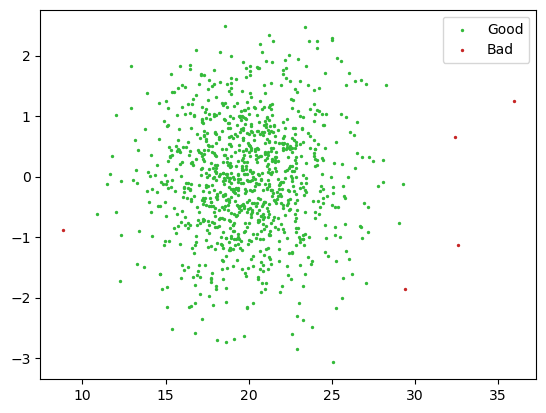

In [11]:
#Using Z-score to find and remover outliers of 1D array

mean, std = np.mean(d1), np.std(d1)
z_score = np.abs((d1-mean)/std)
threshold = 3
good = z_score < threshold
#注意good是一个布尔数组

print(f'Rejection {(~good).sum()} points')
from scipy.stats import norm
print(f'z-score of 3 corresponds to a prob of {100*2*norm.sf(threshold):0.2f}%') #？？？？？？？？？
visual_scatter = np.random.normal(size=d1.size)
plt.scatter(d1[good],visual_scatter[good],s=2,label='Good',color='#34ba3a')
plt.scatter(d1[~good],visual_scatter[~good],s=2,label='Bad',color='#c72626')
plt.legend();

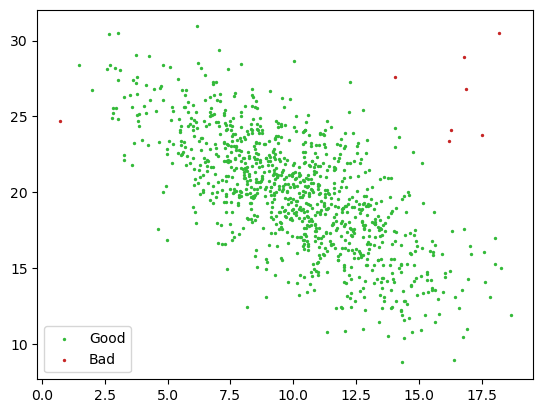

In [12]:
#Using multivariate_normal（多元正态分布）to find and remove outliers of 2D array
from scipy.stats import multivariate_normal as mn
mean, cov = np.mean(d2,axis=0), np.cov(d2.T) 
#二维数组每行表示一个数据点；通过使用.T转置操作，我们将每一行视为一个变量。
good = mn(mean,cov).pdf(d2)>0.01/100 
#mn(mean,cov)表示创建一个多元正态分布对象，其中 mean 是均值向量，cov 是协方差矩阵。
#.pdf计算数据集 d2 中每个样本的概率密度。
#概率密度大于 0.01/100 的样本标记为 True，表示这些样本被认为是异常值。
plt.scatter(d2[good, 0], d2[good,1], s=2, label='Good', color='#34ba3a')
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label='Bad', color='#c72626')
plt.legend();

Automating Outlier Detection:
Local Outlier Factor（LOF）是一种用于检测数据集中局部异常值的算法。它基于每个样本周围邻近样本的密度来评估异常值。

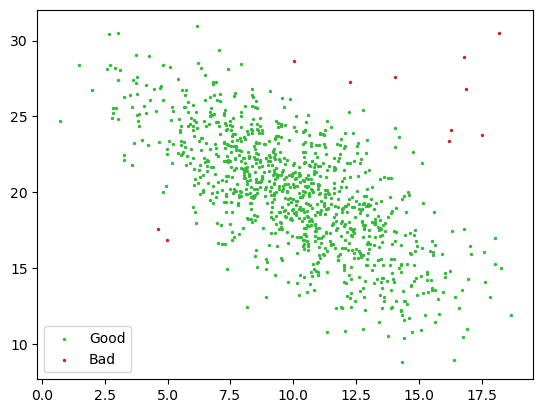

In [14]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
good = lof.fit_predict(d2)>0.5
plt.scatter(d2[good,0], d2[good,1],s=2,label='Good',color='#34ba3a')
plt.scatter(d2[~good, 0], d2[~good,1], s=2, label='Bad', color='#c72626')
plt.legend();